In [1]:
from pandas import read_csv
#series = read_csv('datasets/yearly-water-usage.csv')
series = read_csv('yearly-water-usage.csv',index_col=0)

series.head()

,Water
Year,
1885,356
1886,386
1887,397
1888,397
1889,413


In [2]:
series.info()  # Note : Yearly data from 1885 to 1963

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 1885 to 1963
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Water   79 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB


In [3]:
## -- DON'T RUN this code --
## -- SAMPLE CODE --
# prepare data. spliting into train and test set
X = series.values
X = X.astype('float32')
# Always convert a loaded dataset to float32 in case the loaded data 
# still has some String or Integer data types.

train_size = int(len(X) * 0.50)  ## 79/2 => 39.5, train_size = 39, 

train, test = X[0 : train_size], X[ train_size : ]  ## train has 39 records , test has 40 records

In [5]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

# load data
series = read_csv('yearly-water-usage.csv', index_col=0)

# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]

predictions = list()

for i in range(len(test)):
	# predict
	yhat = history[-1] # using the last i.e 39th record to predict 40th record
	predictions.append(yhat)

    # observation
	obs = test[i]  # test has data from 40th record
	history.append(obs)
	print('>Predicted= ' ,yhat, 'Expected= ', obs)

# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=  [492.] Expected=  [503.]
>Predicted=  [503.] Expected=  [503.]
>Predicted=  [503.] Expected=  [450.]
>Predicted=  [450.] Expected=  [432.]
>Predicted=  [432.] Expected=  [432.]
>Predicted=  [432.] Expected=  [458.]
>Predicted=  [458.] Expected=  [462.]
>Predicted=  [462.] Expected=  [503.]
>Predicted=  [503.] Expected=  [488.]
>Predicted=  [488.] Expected=  [466.]
>Predicted=  [466.] Expected=  [492.]
>Predicted=  [492.] Expected=  [503.]
>Predicted=  [503.] Expected=  [515.]
>Predicted=  [515.] Expected=  [500.]
>Predicted=  [500.] Expected=  [522.]
>Predicted=  [522.] Expected=  [575.]
>Predicted=  [575.] Expected=  [583.]
>Predicted=  [583.] Expected=  [587.]
>Predicted=  [587.] Expected=  [628.]
>Predicted=  [628.] Expected=  [640.]
>Predicted=  [640.] Expected=  [609.]
>Predicted=  [609.] Expected=  [606.]
>Predicted=  [606.] Expected=  [632.]
>Predicted=  [632.] Expected=  [617.]
>Predicted=  [617.] Expected=  [613.]
>Predicted=  [613.] Expected=  [598.]
>Predicted= 

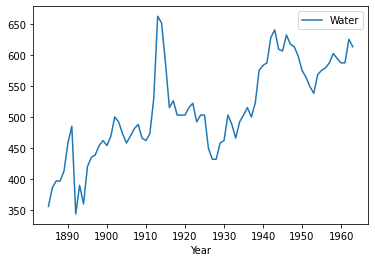

In [6]:
from pandas import read_csv
from matplotlib import pyplot

series.plot();
pyplot.show();

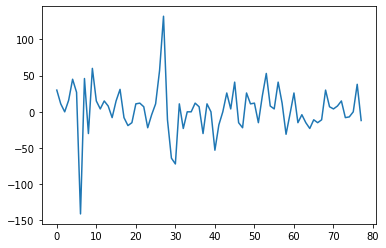

In [7]:
import pandas as pd 
from pandas import read_csv
from matplotlib import pyplot
 
X = series.values
X = X.astype('float32')

# Differencing data to make the time series stationary
# this would help us in reducing the trend
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)

stationary = pd.DataFrame(diff)
#stationary.dropna();
#stationary = stationary[1:]

# plot differenced data
stationary.plot(legend=False)
pyplot.show();

In [9]:
from statsmodels.tsa.stattools import adfuller

# check for Stationarity
X = stationary.iloc[ : , 0].values
#print(X) 
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
print('Critical Values:' ,result[4])

## result[2], [3]  -> lags , nobs respectively 

ADF Statistic: -6.693248
p-value: 0.000000
Critical Values:
Critical Values: {'1%': -3.5194805351545413, '5%': -2.9003945086747343, '10%': -2.5874984279778395}
